In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# plot tree
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# global variables
start_features = ["Age", "Department"]
target = "Attrition"


In [33]:
def main():
    # create dataframe with project's data set
    df = pd.read_csv('HR.csv')
    
    # clean the data
    clean_df = clean_data(df)
    
    # get features matrix X and target variable y
    X, y = feature_selection(clean_df)
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=3)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Model Accuracy
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        
    # Plot Tree
    plot_tree(clf, X.columns.tolist())
    

In [4]:
def extract_categoricals(df):
    # extract a list of all categorical features for feature engineering
    cat_features = df.select_dtypes(include=['object']).columns.tolist()
    return cat_features
        

In [5]:
def clean_data(df):
    # drop columns that are not needed
    for col_header in df.columns:
        if col_header not in start_features and col_header != target:
            df.drop(col_header, axis=1, inplace=True) 
            
    # drop rows that contain at least one empty cell
    df.dropna(axis='rows', thresh=1)
    
    # change Yes or No in Attrition column to 0 and 1
    df[target] = df[target].map({'Yes': 1, 'No': 0})
    
    # og_features = df.columns.tolist()
    
    # feature enigneering for categorical data
    clean_df = pd.get_dummies(data=df, columns=extract_categoricals(df))   
    return clean_df


In [6]:
def feature_selection(df):
    # get new feature list
    features = df.columns.tolist()
    
    # exclude target from features
    features.pop(features.index(target))
    
    # split dataset in features and target variable
    X = df[features] # Features Matrix
    y = df[target] # Target variable
    return X, y


In [36]:
def plot_tree(clf, features):
    
    # Setting dpi = 300 to make image clearer than default
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)

    tree.plot_tree(clf,
           feature_names = features, 
           class_names= ['0','1'],
           filled = True,
           fontsize=15);

    fig.savefig('tree.png')


Accuracy: 0.8208616780045351


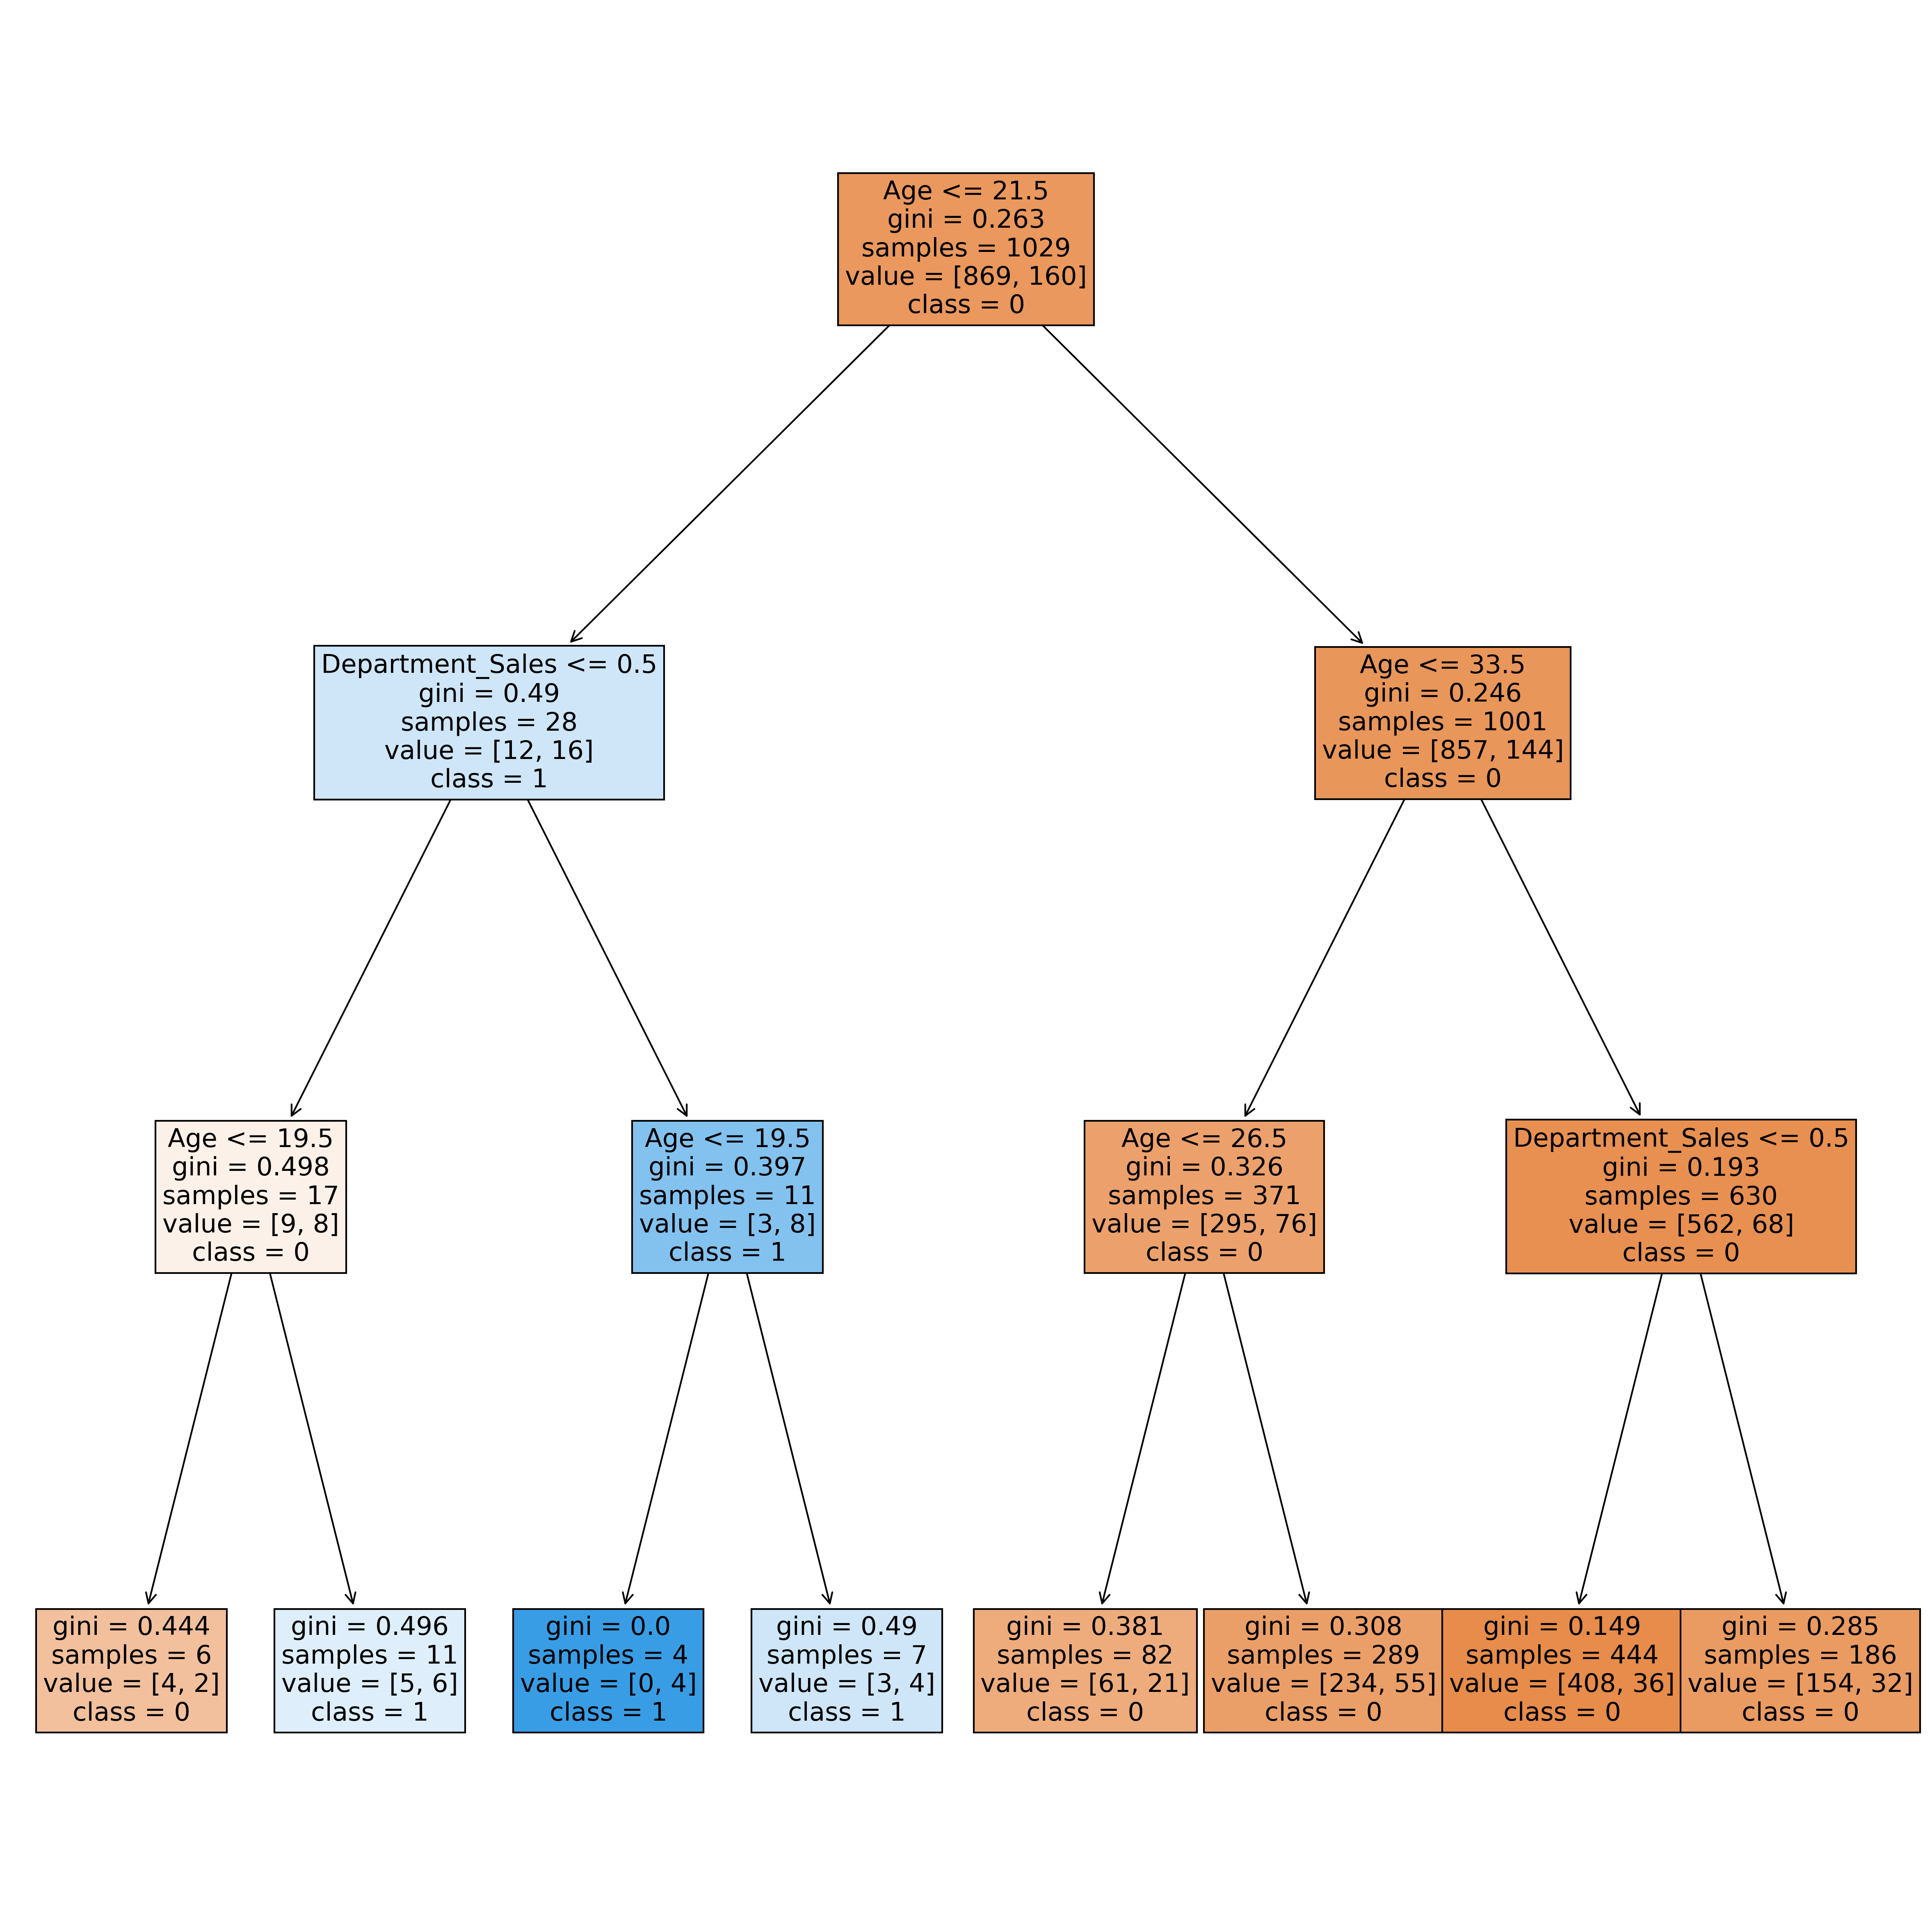

In [37]:
# test
if __name__ == '__main__':
    main()
